In [5]:
# Install required packages (if not already installed)
!pip install numpy pandas seaborn matplotlib

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Download and load the dataset (for dataset_part_2)
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)

# Display the first 5 records
print(df.head(5))



   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


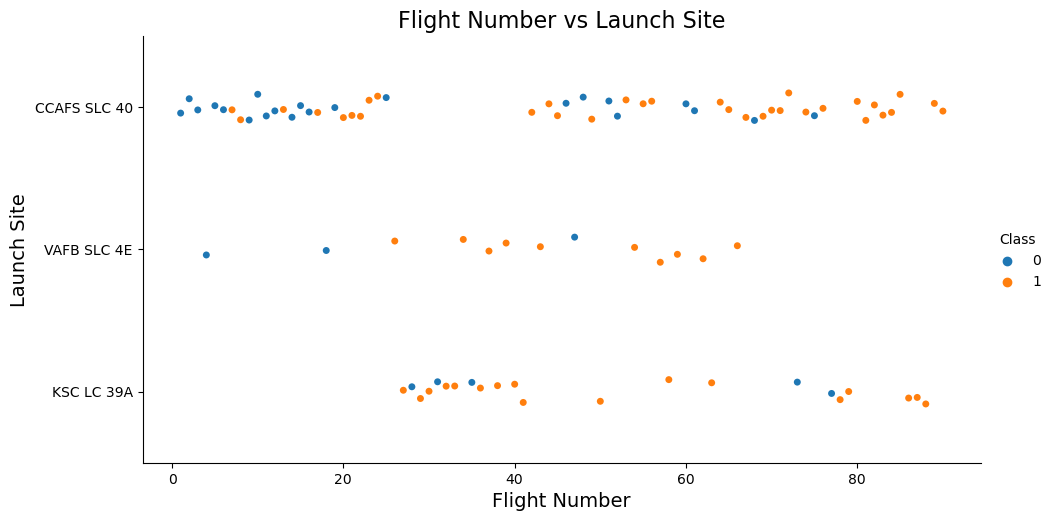

In [6]:
# Plot a strip plot for FlightNumber vs LaunchSite with hue set to Class
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", 
            data=df, kind="strip", height=5, aspect=2)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.show()


C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


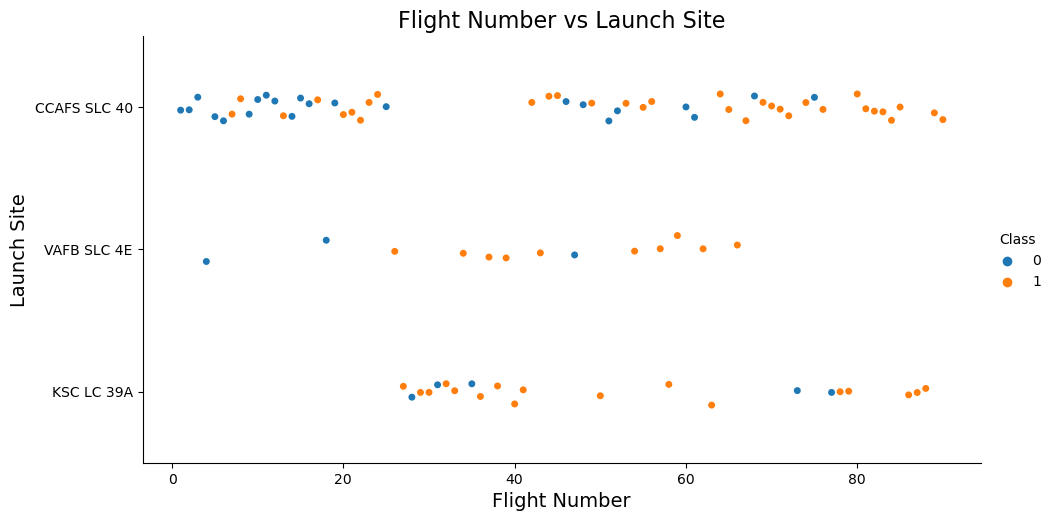

In [7]:
# Plot a strip plot for FlightNumber vs LaunchSite with hue set to Class
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", 
            data=df, kind="strip", height=5, aspect=2)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.show()


C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


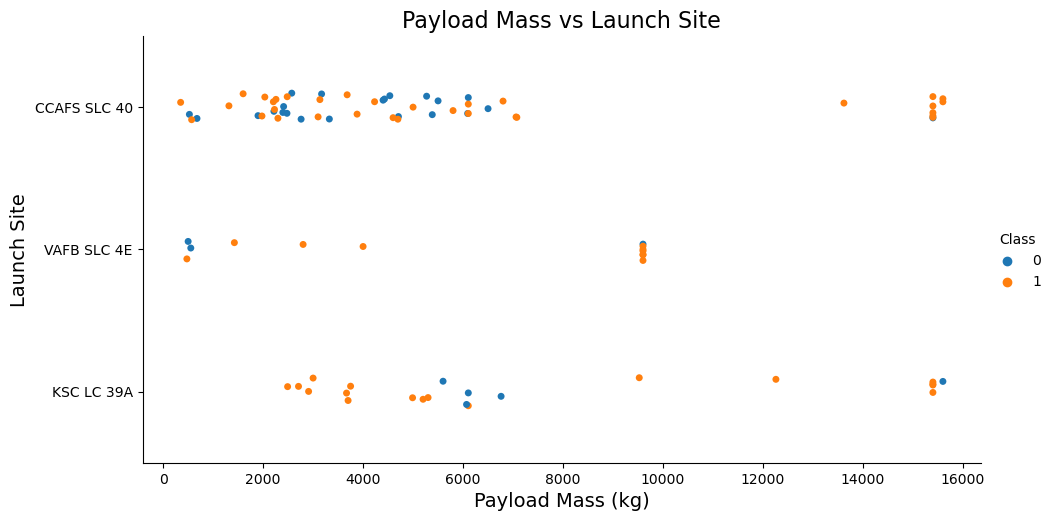

In [8]:
# Plot a strip plot for PayloadMass vs LaunchSite with hue set to Class
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", 
            data=df, kind="strip", height=5, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.show()


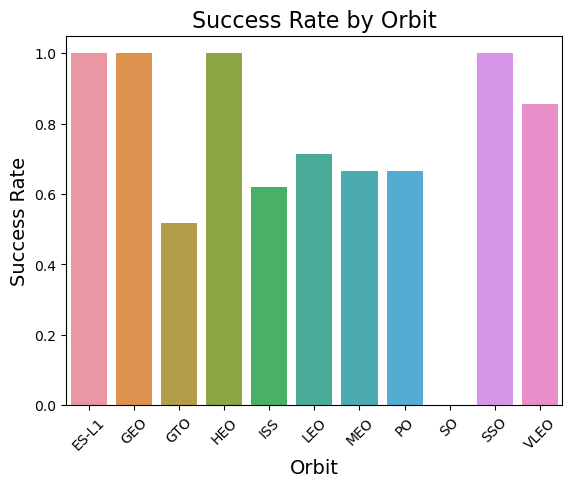

In [9]:
# Group by the Orbit column and calculate the mean success rate (Class)
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Plot a bar chart of success rate by orbit type
sns.barplot(x="Orbit", y="Class", data=orbit_success)
plt.xlabel("Orbit", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit", fontsize=16)
plt.xticks(rotation=45)
plt.show()


C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


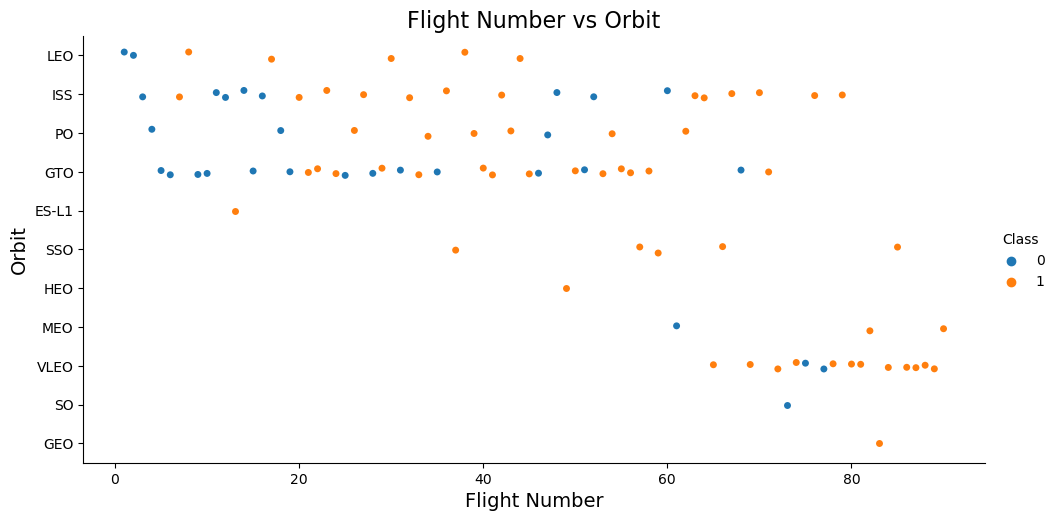

In [10]:
# Plot a strip plot for FlightNumber vs Orbit with hue set to Class
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", 
            data=df, kind="strip", height=5, aspect=2)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Flight Number vs Orbit", fontsize=16)
plt.show()


C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


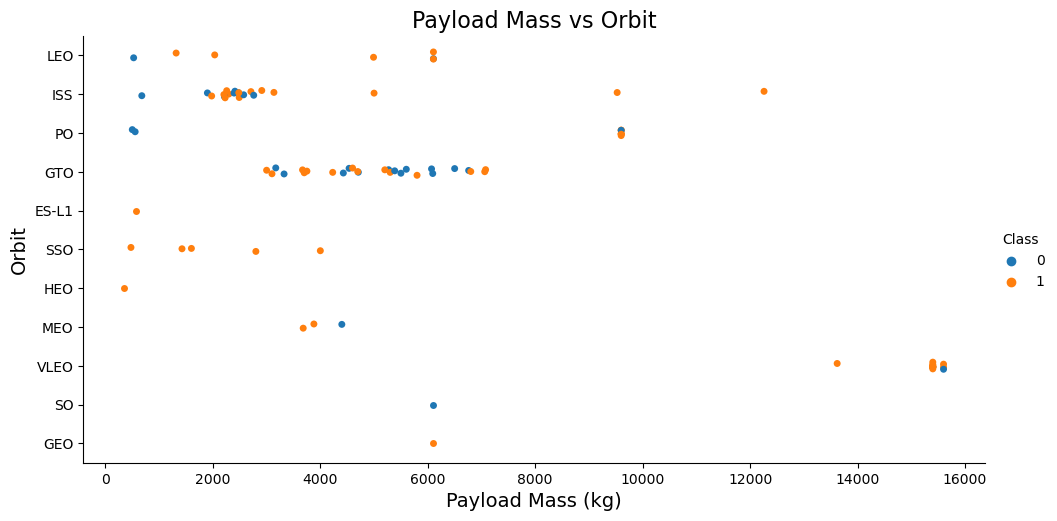

In [11]:
# Plot a strip plot for PayloadMass vs Orbit with hue set to Class
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", 
            data=df, kind="strip", height=5, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Payload Mass vs Orbit", fontsize=16)
plt.show()


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857

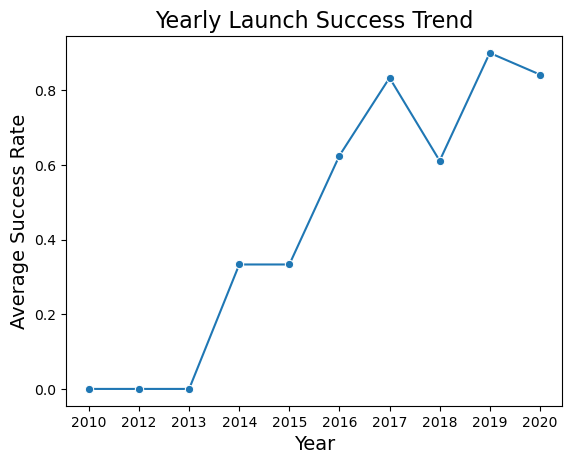

In [12]:
# Extract the year from the Date column and add it as a new column called "Year"
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Year'] = year

# Display the first few records to confirm the Year column
print(df.head())

# Group by Year and compute the average success rate (mean of Class)
yearly_success = df.groupby("Year")["Class"].mean().reset_index()

# Plot a line chart for Year vs Average Success Rate
sns.lineplot(x="Year", y="Class", data=yearly_success, marker="o")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Yearly Launch Success Trend", fontsize=16)
plt.show()


In [13]:
# Select features for encoding
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 
               'ReusedCount', 'Serial']]

# Create dummy variables for the categorical columns: Orbit, LaunchSite, LandingPad, and Serial
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first 5 records of the one-hot encoded dataframe
print(features_one_hot.head())


   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0        False      False  ...         False         False   
1            0        False      False  ...         False         False   
2            0        False      False  ...         False         False   
3            0        False      False  ...         False         False   
4            0        False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False      

In [14]:
# Cast the entire features_one_hot dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Print data types to confirm conversion
print(features_one_hot.dtypes)

# Export the final DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("Exported dataset_part_3.csv")


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object
Exported dataset_part_3.csv


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Function to plot the confusion matrix
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'land'])
    plt.show()


In [16]:
# Download dataset for part 2 (contains column 'Class')
# If using an environment with 'await', you can use the following; otherwise, use requests.
import requests, io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(io.BytesIO(response1.content))
print("Dataset part 2 (first 5 rows):")
print(data.head())

# Download dataset for part 3 (features data)
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
response2 = requests.get(URL2)
X = pd.read_csv(io.BytesIO(response2.content))
print("\nDataset part 3 (first 10 rows):")
print(X.head(10))


Dataset part 2 (first 5 rows):
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B00

In [17]:
# TASK 1: Create a NumPy array from the column 'Class' in data.
# Make sure to use single bracket notation to produce a Pandas Series.
Y = data['Class'].to_numpy()
print("Target variable Y (first 10 elements):")
print(Y[:10])


Target variable Y (first 10 elements):
[0 0 0 0 0 0 1 1 0 0]


In [18]:
# TASK 2: Standardize the data in X using StandardScaler
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)
# Reassign X to a DataFrame with the original columns
X = pd.DataFrame(X_scaled, columns=X.columns)
print("Standardized features (first 5 rows):")
print(X.head())


Standardized features (first 5 rows):
   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Orbit_ES-L1  \
0     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344       -0.106   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344       -0.106   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344       -0.106   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344       -0.106   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344       -0.106   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
1     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
2     -0.106  -0.654654     -0.106   1.812654  ...     -0.185695   
3     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
4     -0.106   1.527525     -0.106  -0.551677  ...     -0.185695   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \


In [19]:
# TASK 3: Split data into training and test sets
# Use test_size=0.2 and random_state=2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Shape of Y_test:", Y_test.shape)


Shape of Y_test: (18,)


In [20]:
# TASK 4: Create a logistic regression object and a GridSearchCV object to tune hyperparameters.
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (Logistic Regression):", logreg_cv.best_params_)
print("Logistic Regression validation accuracy:", logreg_cv.best_score_)


Tuned hyperparameters (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression validation accuracy: 0.8464285714285713


Test Accuracy for Logistic Regression: 0.8333333333333334


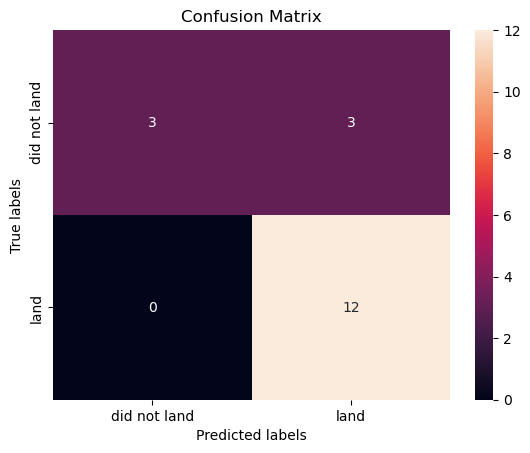

In [21]:
# TASK 5: Evaluate logistic regression on test data and plot the confusion matrix
accuracy_lr = logreg_cv.score(X_test, Y_test)
print("Test Accuracy for Logistic Regression:", accuracy_lr)
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)


In [22]:
# TASK 6: Create a Support Vector Machine object and tune its hyperparameters using GridSearchCV.
parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (SVM):", svm_cv.best_params_)
print("SVM validation accuracy:", svm_cv.best_score_)


Tuned hyperparameters (SVM): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM validation accuracy: 0.8482142857142856


Test Accuracy for SVM: 0.8333333333333334


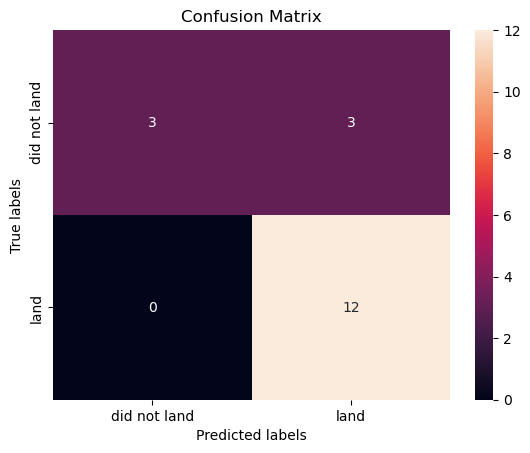

In [23]:
# TASK 7: Evaluate the SVM model on test data and plot the confusion matrix.
accuracy_svm = svm_cv.score(X_test, Y_test)
print("Test Accuracy for SVM:", accuracy_svm)
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)


In [24]:
# TASK 8: Create a decision tree classifier and tune its hyperparameters using GridSearchCV.
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (Decision Tree):", tree_cv.best_params_)
print("Decision Tree validation accuracy:", tree_cv.best_score_)


Tuned hyperparameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree validation accuracy: 0.8892857142857145


C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prati\anaconda3\Lib\site-pac

Test Accuracy for Decision Tree: 0.7777777777777778


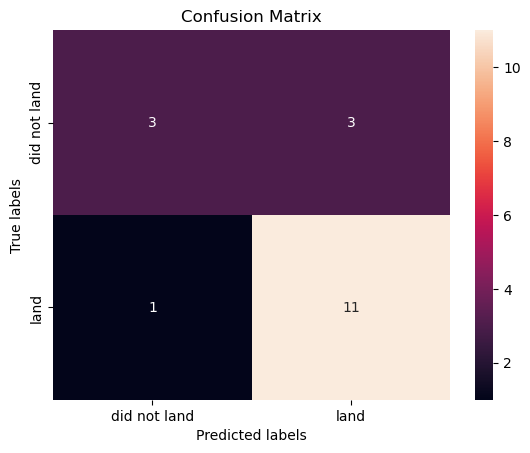

In [25]:
# TASK 9: Evaluate the decision tree model on test data and plot the confusion matrix.
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test Accuracy for Decision Tree:", accuracy_tree)
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)


In [26]:
# TASK 10: Create a K-Nearest Neighbors object and tune its hyperparameters using GridSearchCV.
parameters_knn = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (KNN):", knn_cv.best_params_)
print("KNN validation accuracy:", knn_cv.best_score_)


C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

Tuned hyperparameters (KNN): {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}
KNN validation accuracy: 0.8482142857142858


C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prati\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

Test Accuracy for KNN: 0.8333333333333334


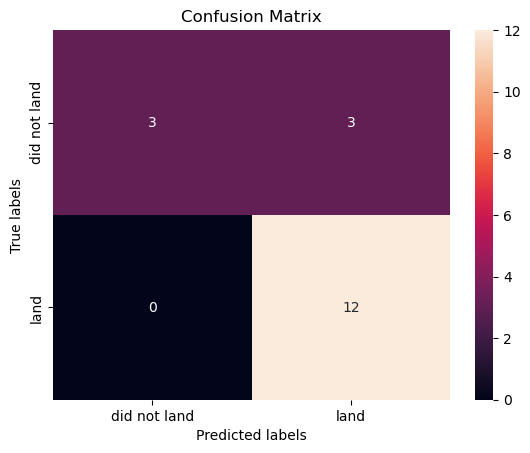

In [27]:
# TASK 11: Evaluate the KNN model on test data and plot the confusion matrix.
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Test Accuracy for KNN:", accuracy_knn)
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)


In [28]:
# TASK 12: Compare the test accuracies to determine which method performs best.
print("Logistic Regression Test Accuracy:", accuracy_lr)
print("SVM Test Accuracy:", accuracy_svm)
print("Decision Tree Test Accuracy:", accuracy_tree)
print("KNN Test Accuracy:", accuracy_knn)

# Determine the best performing method:
accuracies = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}
best_method = max(accuracies, key=accuracies.get)
print("Best performing method on test data:", best_method)


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.7777777777777778
KNN Test Accuracy: 0.8333333333333334
Best performing method on test data: Logistic Regression
